In [9]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [10]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

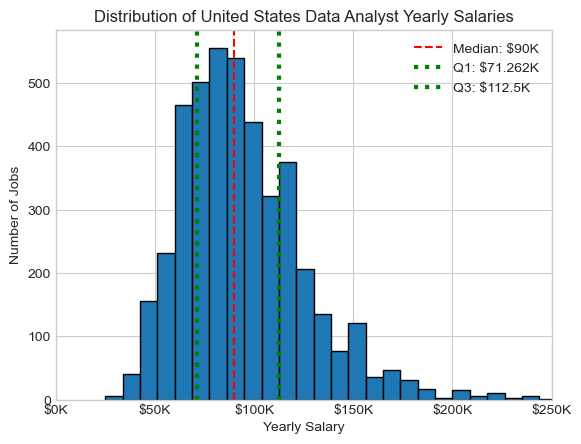

In [13]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black', label='')
plt.xlim(0,250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

median_salary = df_DA_US['salary_year_avg'].median()
plt.axvline(median_salary, color = 'red', linestyle ='dashed', linewidth = 1.5, label=f'Median: ${int(median_salary/1000)}K')

quantile_25 = df_DA_US['salary_year_avg'].quantile(0.25)
plt.axvline(quantile_25, color='green', linestyle=':', linewidth=3, label=f'Q1: ${int(quantile_25)/1000}K')

quantile_75 = df_DA_US['salary_year_avg'].quantile(0.75)
plt.axvline(quantile_75, color='green', linestyle=':', linewidth=3, label=f'Q3: ${int(quantile_75)/1000}K')

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.legend()
plt.show()

### Histogram visualization generated by Gemini

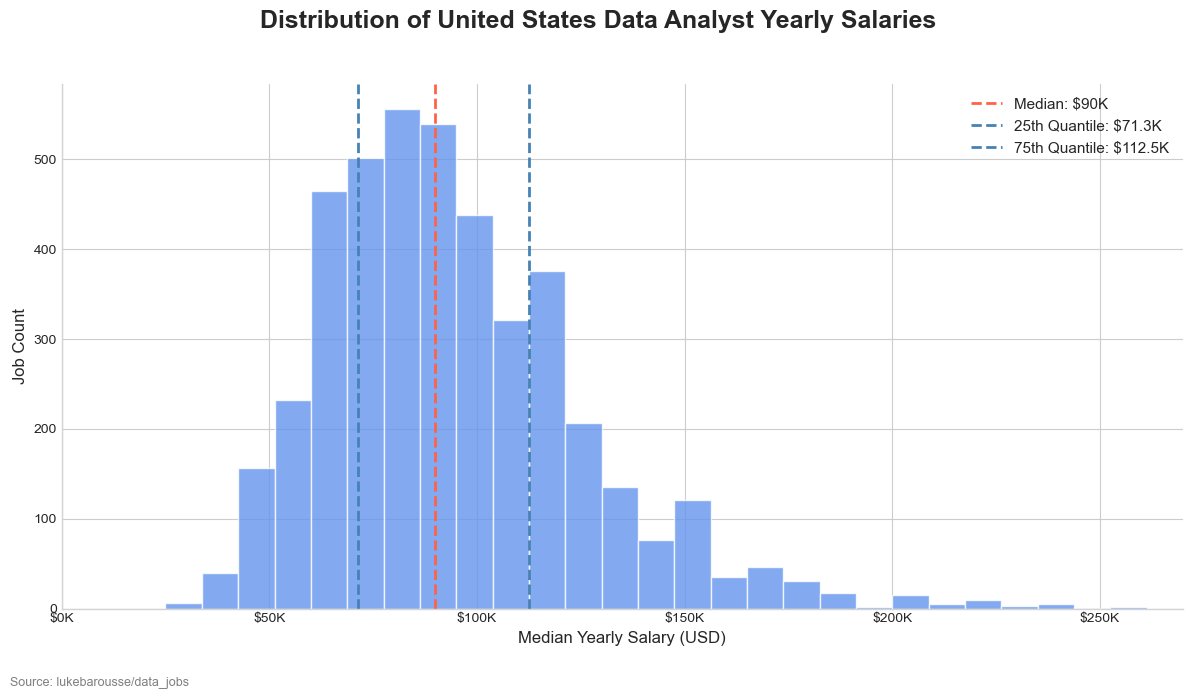

In [12]:
plt.style.use('seaborn-v0_8-whitegrid')

# Color Palette
HIST_COLOR = '#6495ED'      
MEDIAN_COLOR = '#FF6347'   
QUANTILE_COLOR = '#4682B4' 

# Creat Figure and Axis for Better Visualization
fig, ax = plt.subplots(figsize=(12, 7))

# Plotting Histogram with Transparency (alpha)
ax.hist(df_DA_US['salary_year_avg'], bins=40, color=HIST_COLOR, edgecolor='white', alpha=0.8)
plt.xlim(0,270000)

median_salary = df_DA_US['salary_year_avg'].median()
quantile_75 = df_DA_US['salary_year_avg'].quantile(0.75)
quantile_25 = df_DA_US['salary_year_avg'].quantile(0.25)

# Adding Vertical Lines
ax.axvline(median_salary, color=MEDIAN_COLOR, linestyle='--', linewidth=2, label=f'Median: ${(median_salary/1000):.0f}K')
ax.axvline(quantile_25, color=QUANTILE_COLOR, linestyle='--', linewidth=2, label=f'25th Quantile: ${(quantile_25/1000):.1f}K')
ax.axvline(quantile_75, color=QUANTILE_COLOR, linestyle='--', linewidth=2, label=f'75th Quantile: ${(quantile_75/1000):.1f}K')

# Title and Subtitle for Visual Hierarchy
fig.suptitle('Distribution of United States Data Analyst Yearly Salaries', fontsize=18, fontweight='bold', ha='center')

# Axis Labels
ax.set_xlabel('Median Yearly Salary (USD)', fontsize=12)
ax.set_ylabel('Job Count', fontsize=12)

# Formatting X Label
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

# Removing Unnecessaries Spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')

# Removing Lengend Edges
ax.legend(loc='upper right', frameon=False, fontsize=11)

# Adding a Note in the Footer
fig.text(0.01, 0.01, 'Source: lukebarousse/data_jobs ', ha='left', va='bottom', fontsize=9, color='gray')

# Adjusting Layout to avoid Overlay
plt.tight_layout(rect=[0, 0.05, 1, 0.95]) # Adjusting Spaces for Title and Footer
plt.show()